In [7]:
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

In [9]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [10]:
data, labels = make_moons(200, noise=0.3, random_state=42)
test_data, test_labels = make_moons(10000, noise=0.3, random_state=43)

In [11]:
h = 0.02
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

In [16]:
def plot_for_depth(depth):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=41).fit(data, labels)
    train_loss = roc_auc_score(labels, clf.predict_proba(data)[:, 1])
    test_loss = roc_auc_score(test_labels, clf.predict_proba(test_data)[:, 1])
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    fig, (ax_tree, ax_surface) = plt.subplots(1, 2, figsize=(10, 4))
    ax_surface.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax_surface.scatter(data[:, 0], data[:, 1], c=labels, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    ax_surface.set_xlabel("X")
    ax_surface.set_ylabel("Y")
    ax_surface.set_title(f'Train AUC={train_loss:.3f}; test AUC={test_loss:.3f}')
    plot_tree(clf, ax=ax_tree, feature_names=["X", "Y"], class_names=["red", "blue"], filled=True)
    plt.show()

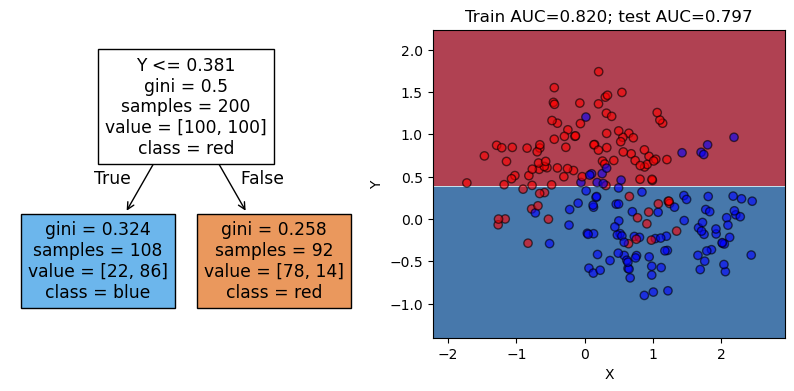

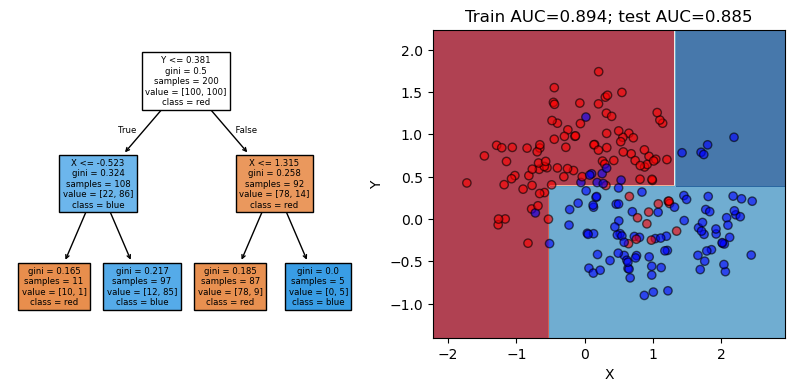

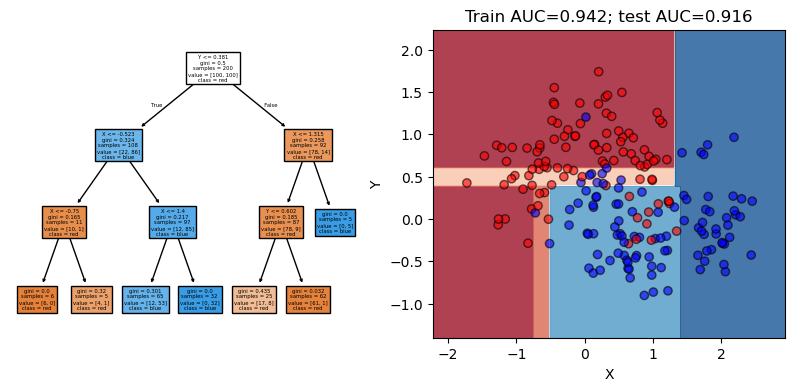

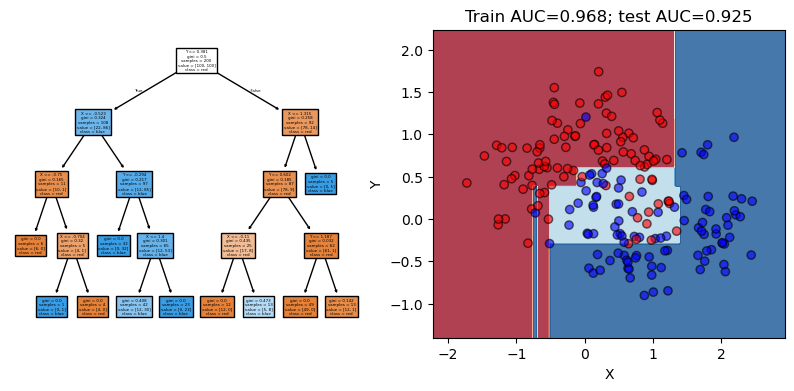

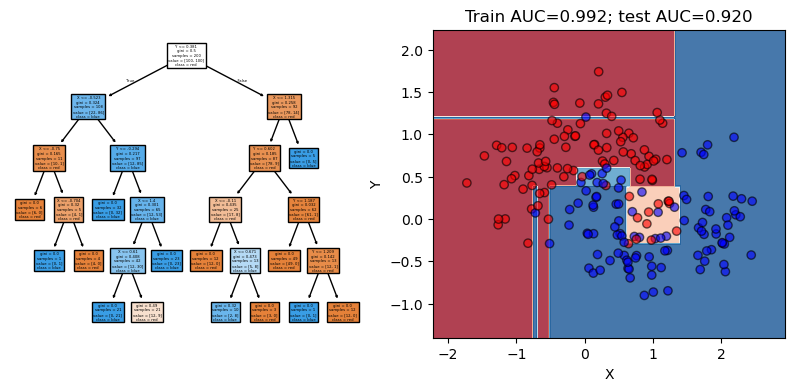

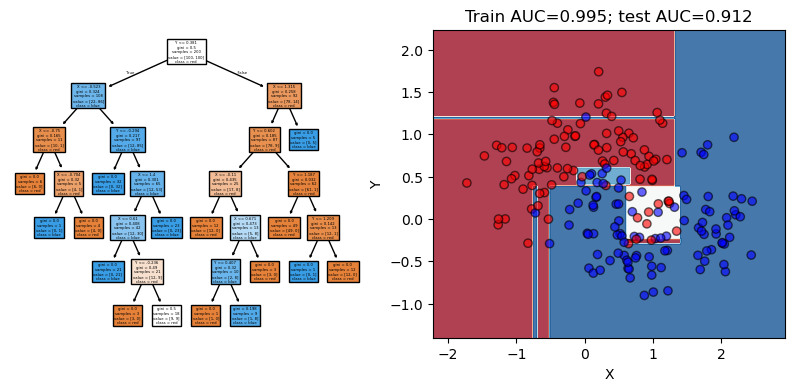

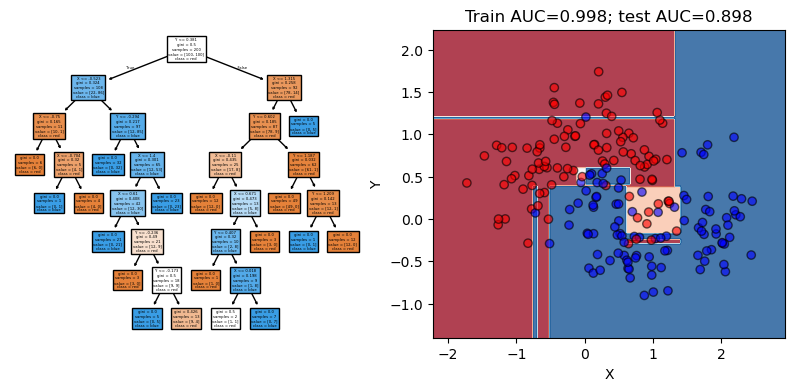

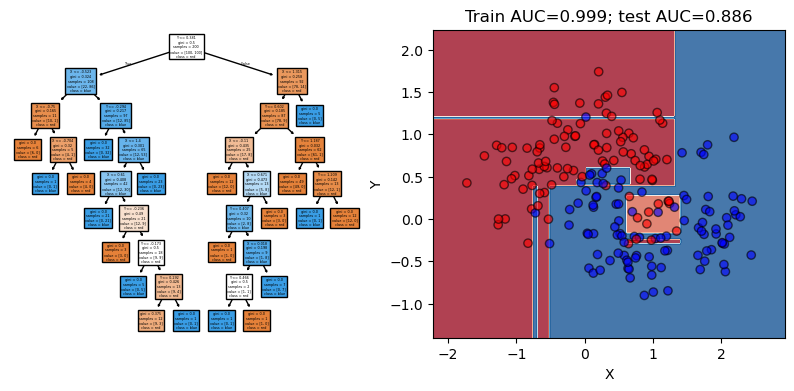

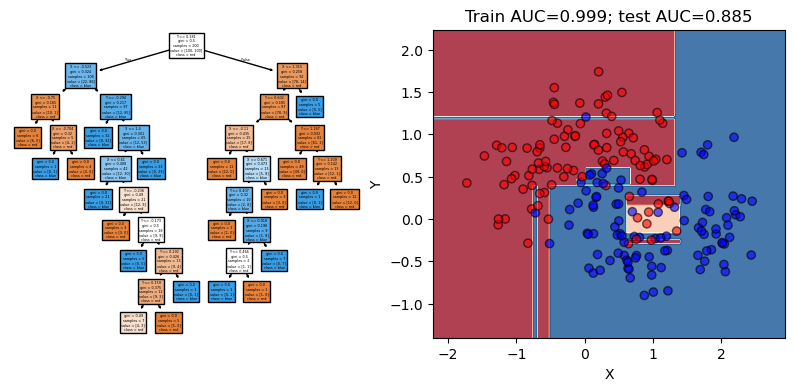

In [17]:
for depth in range(1, 10):
    plot_for_depth(depth)